# Задача 17

Идентификация видов стекла. Часто на месте преступления остаются осколки разных видов стекол, которые можно использовать как улики, если определить тип стекла и от каких оно объектов. Выборка состоит из 9 признаков - химических параметров образцов и 214 объектов. Необходимо каждому образцу сопоставить один из 6 классов (например: стекло автомобиля, осколок посуды, окно здания) и сравнить качество работы решающего дерева и алгоритма решающего дерева и алгоритма k-ближайших соседей. В качестве функции ошибки использовать долю неправильных ответов классификатора. Дает ли масштабирование признаков значительное улучшение в качестве классификации?

In [2]:
from sklearn import cross_validation, neighbors, metrics, tree 
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24
import pandas as pd 
import numpy as np 
 
columnNames = ['Id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'] 
glass = pd.read_csv("glass.data.txt",names = columnNames, header = None)

In [3]:
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Получим зависимость значения ошибки и его стандартного отклонения от объема выборки на обучении и контроле:

In [4]:
X_train = []
X_test = []
y_train = []
y_test = []
size = np.arange(0.05, 1.00, 0.05)
for i in size:
    X_train_i, X_test_i, y_train_i, y_test_i = cross_validation.train_test_split(glass.loc[:, glass.columns != 'Type of glass'], glass['Type of glass'], 
test_size = i)
    X_train.append(X_train_i)
    X_test.append(X_test_i)
    y_train.append(y_train_i)
    y_test.append(y_test_i)

## Aлгоритм k-ближайших соседей:

In [6]:
predictionsNeigbor = [] 
errorsNeighbor = []
variancesNeighbor = []

for i in range(len(size)):
    neighbor = neighbors.KNeighborsClassifier() 
    neighbor.fit(X_train[i],y_train[i]) 
    predictions = neighbor.predict(X_test[i]) 
    accuracyNeighbor = metrics.accuracy_score(y_test[i], predictions) 
    predictionsNeigbor.append(predictions)
    errorsNeighbor.append(accuracyNeighbor)
    variancesNeighbor.append(np.var(errorsNeighbor))

Точность при 30% выборки:

In [7]:
print errorsNeighbor[5]

0.984615384615


## Aлгоритм решающего дерева:

In [8]:
predictionsTreeDecision = []
errorsTreeDecision = []
variancesTreeDecision = []

for i in range(len(size)):
    treeDecision = tree.DecisionTreeClassifier()
    treeDecision.fit(X_train[i],y_train[i]) 
    predictions = treeDecision.predict(X_test[i]) 
    accuracyTreeDecision = metrics.accuracy_score(y_test[i], predictions) 
    predictionsTreeDecision.append(predictions)
    errorsTreeDecision.append(accuracyTreeDecision)
    variancesTreeDecision.append(np.var(errorsTreeDecision))

Точность при 30% выборки:

In [9]:
print errorsTreeDecision[5]

0.984615384615


## Сравним точность двух методов

Вычислим значение ошибки и стандартного отклонения.

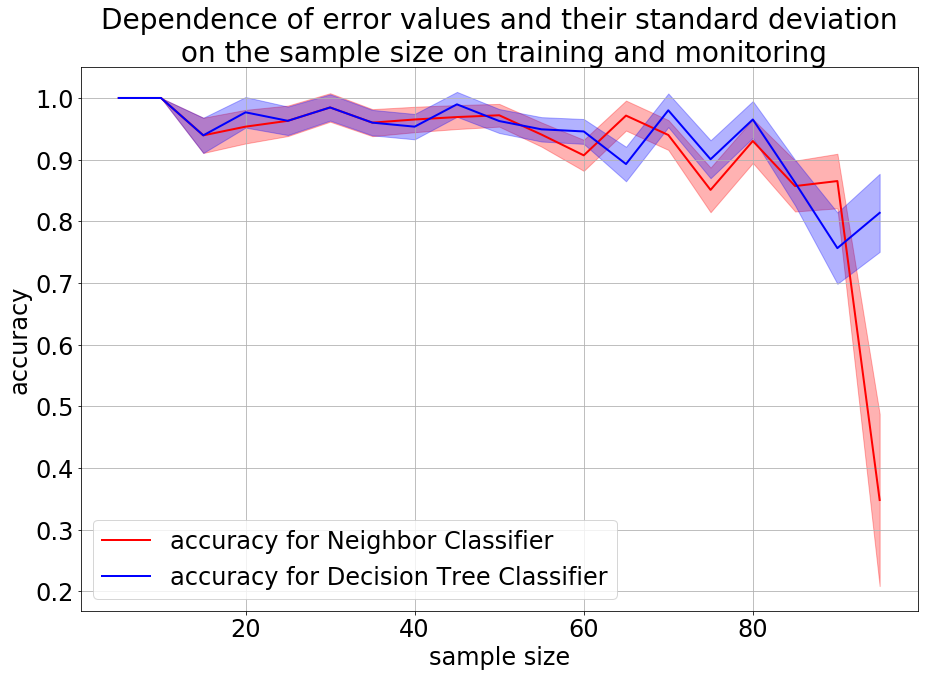

In [10]:
x = np.asarray(size * 100)
variancesNeighbor_y = np.asarray(variancesNeighbor)
variancesTreeDecision_y = np.asarray(variancesTreeDecision)
plt.figure(figsize=(15, 10))

plt.plot(x, errorsNeighbor, color='r', label='accuracy for Neighbor Classifier')
plt.fill_between(x, errorsNeighbor + np.sqrt(variancesNeighbor_y), errorsNeighbor - np.sqrt(variancesNeighbor_y), color='r', alpha = 0.3)

plt.plot(x, errorsTreeDecision, color='b', label='accuracy for Decision Tree Classifier')
plt.fill_between(x, errorsTreeDecision + np.sqrt(variancesTreeDecision_y), errorsTreeDecision - np.sqrt(variancesTreeDecision_y), color='b', alpha = 0.3)

plt.title("Dependence of error values and their standard deviation\n on the sample size on training and monitoring")
plt.xlabel('sample size')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Вывод

Алгоритмы дают примерно одинаковую точность.  Оптимальным параметром для объема выборки является 20-30%.